In [15]:
import pandas as pd

In [186]:
import seaborn as sns

In [188]:
import matplotlib.pyplot as plt

In [190]:
avocado = pd.read_csv("avocado.csv", na_values="?")

In [192]:
# Dispplay the First Five Rows
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [194]:
# Display the basic info and its columns
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [196]:
# Convert Date column to datetime type and Repeat question 3
avocado['Date'] = pd.to_datetime(avocado['Date'])
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [198]:
# Filter the data with QUERY(), contains just rows 2015,
# CONVENTIONAL TYPE, REGION NAMED ALBANY
# Store only DATE, TOTAL BAGS, SMALL BAGS into new dataframe
# DISPLAY first 5 rows
albany_2015 = avocado.query("year == 2015 and type == 'conventional' and region == 'Albany'")[['Date', 'Total Bags', 'Small Bags']]
print(albany_2015.head())

        Date  Total Bags  Small Bags
0 2015-12-27     8696.87     8603.62
1 2015-12-20     9505.56     9408.07
2 2015-12-13     8145.35     8042.21
3 2015-12-06     5811.16     5677.40
4 2015-11-29     6183.95     5986.26


In [230]:
# Melt the data in the Total Bags and Small bags,
# But not value column, name column as Bags, and column 
# That contain number of bas as COUNT.
# DISPLAY melted DF
melted_avocado= pd.melt(avocado, id_vars=['Date'], value_vars=['Total Bags', 'Small Bags'], var_name='Bags', value_name='Count')

print(melted_avocado)

            Date        Bags     Count
0     2015-12-27  Total Bags   8696.87
1     2015-12-20  Total Bags   9505.56
2     2015-12-13  Total Bags   8145.35
3     2015-12-06  Total Bags   5811.16
4     2015-11-29  Total Bags   6183.95
...          ...         ...       ...
36493 2018-02-04  Small Bags  13066.82
36494 2018-01-28  Small Bags   8940.04
36495 2018-01-21  Small Bags   9351.80
36496 2018-01-14  Small Bags  10919.54
36497 2018-01-07  Small Bags  11988.14

[36498 rows x 3 columns]


<Axes: xlabel='Date', ylabel='Count'>

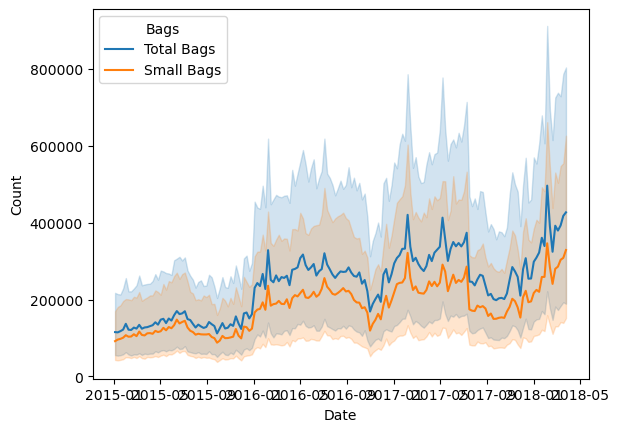

In [238]:
# PLOT with SEABORN LINE PLOT, use DATE as x-axis,
# Count as y-axis, BAGS for hue
sns.lineplot(x='Date', y='Count', hue='Bags', data=melted_avocado)

In [310]:
labels = ['poor', 'modest', 'good', 'excellent']
avocado['Volume Category'] = pd.qcut(avocado['Total Volume'], q=4, labels=labels)

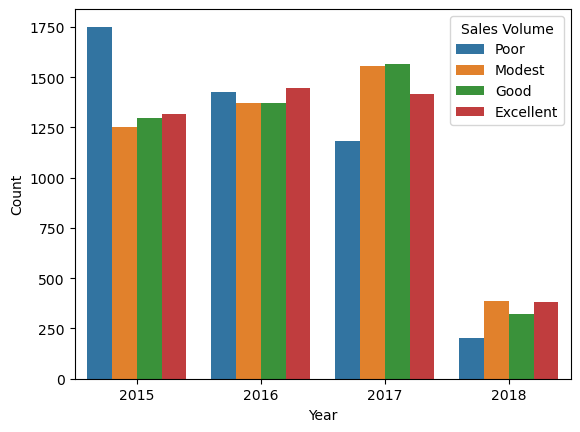

In [245]:
# PLOT binned data BY YEAR with sns.countplot()
avocado['Sales Volume'] = pd.qcut(avocado['Total Volume'], q=4, labels=['Poor', 'Modest', 'Good', 'Excellent'])
sns.countplot(data=avocado, x='year', hue='Sales Volume')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [484]:
# MELT three bag size columns specfying var_name Bags and value_name = Count
# Display melted DF.
melted_df = pd.melt(avocado, id_vars=['year'], value_vars=['Small Bags','Large Bags', 'XLarge Bags'], var_name='Bags', value_name='Count')
print(melted_df)

       year         Bags    Count
0      2015   Small Bags  8603.62
1      2015   Small Bags  9408.07
2      2015   Small Bags  8042.21
3      2015   Small Bags  5677.40
4      2015   Small Bags  5986.26
...     ...          ...      ...
54742  2018  XLarge Bags     0.00
54743  2018  XLarge Bags     0.00
54744  2018  XLarge Bags     0.00
54745  2018  XLarge Bags     0.00
54746  2018  XLarge Bags     0.00

[54747 rows x 3 columns]


<Axes: xlabel='year', ylabel='Count'>

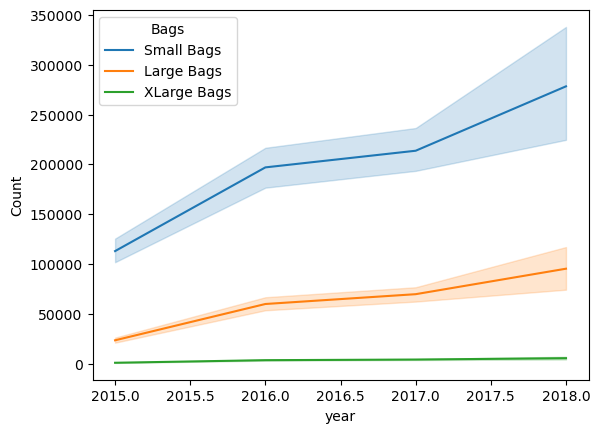

In [492]:
# Plot bags by year use sns.replot() with kind = line
# x = year, y = Count, hue = Bags
sns.lineplot(x='year', y='Count', hue='Bags', data=melted_df)

In [472]:
type_volume = avocado.groupby('type')['Total Volume'].sum().reset_index()
sorted_type_volume = type_volume.sort_values('Total Volume', ascending=False)
print(f"The Best Selling bag is {sorted_type_volume.iloc[0]['type']}.")

The Best Selling bag is conventional.


The Best selling is Conventional
